

---- STAGE 1 STARTED ----

--------- Logistic Regression -----------
Accuracy: 0.8855
Confusion Matrix:
 [[189   0   2   1   0   6   3   0   1   1]
 [  0 208   1   0   0   3   0   2   2   0]
 [  1   1 181   3   4   2   3   7   7   4]
 [  1   0   5 184   1   7   1   5   1   3]
 [  0   0   3   0 185   1   8   2   2  14]
 [  0   2   1  10   4 138   3   3  11   2]
 [  3   0   3   0   3   7 180   2   1   1]
 [  1   1   3   1   1   1   0 173   1   5]
 [  1   2   3   7   1   6   1   6 155   4]
 [  0   1   0   3   8   3   0   3   2 178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       203
           1       0.97      0.96      0.97       216
           2       0.90      0.85      0.87       213
           3       0.88      0.88      0.88       208
           4       0.89      0.86      0.88       215
           5       0.79      0.79      0.79       174
           6       0.90      0.90      0.90       200
     

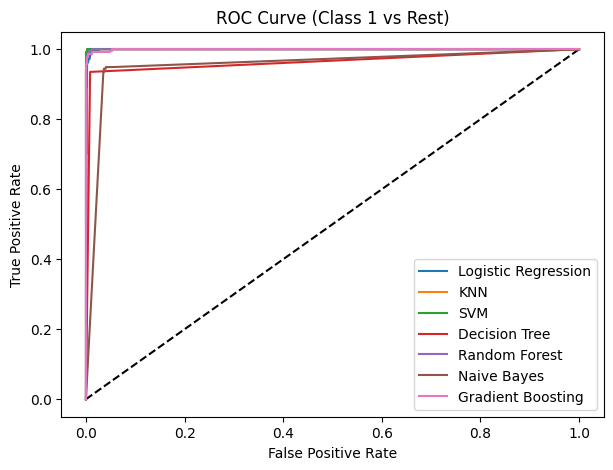


========= AUC SUMMARY =========
Logistic Regression : 0.9985649186181698
KNN : 0.9996717218900515
SVM : 0.9999610737419034
Decision Tree : 0.9633885567181532
Random Forest : 0.9998352121740575
Naive Bayes : 0.9560872882411559
Gradient Boosting : 0.9993771798704534

Best Model Based on AUC: SVM


---- STAGE 3 STARTED ----

---------- STAGE 3 : GRIDSEARCH CV(Hyperparameter Tuning) ---------

Tuning Model: SVM

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.9633752176326796

FINAL MODEL IS READY 


In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  roc_curve, auc

class MNIST_CLASSIFICATION():

  def __init__(self, path):
        try:
            self.path = path
            self.df = pd.read_csv(self.path)
            self.X = self.df.drop("label", axis=1)
            self.y = self.df["label"]
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
            self.results = {}

        except Exception as e:
            ex_type, ex_msg, ex_line = sys.exc_info()
            print(f"Issue is from {ex_line.tb_lineno} : due to : {ex_msg}")


    # STAGE 1 : Accuracy+Metrics

  def train_and_test(self, modelname, model):

        try:
            print(f"\n--------- {modelname} -----------")
            model.fit(self.X_train, self.y_train)
            pred = model.predict(self.X_test)
            acc = accuracy_score(self.y_test, pred)
            print("Accuracy:", acc)
            print("Confusion Matrix:\n", confusion_matrix(self.y_test, pred))
            print("Classification Report:\n", classification_report(self.y_test, pred))
            self.results[modelname] = acc

        except Exception as e:
            ex_type, ex_msg, ex_line = sys.exc_info()
            print(f"Issue at line {ex_line.tb_lineno} : {ex_msg}")

  def execute_models(self):

        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "KNN": KNeighborsClassifier(n_neighbors=3),
            "SVM": SVC(probability=True),
            "Decision Tree": DecisionTreeClassifier(),
            "Random Forest": RandomForestClassifier(),
            "Naive Bayes": GaussianNB(),
            "Gradient Boosting": GradientBoostingClassifier()
        }

        for modelname, model in models.items():
            self.train_and_test(modelname, model)

        print("\n--------- MODEL ACCURACY SUMMARY -----------")
        for name, acc in self.results.items():
            print(f"{name} : {acc}")


    # STAGE 2 : ROC–AUC Evaluation

  def roc_auc_stage2(self):

        try:
            print("\n-------------STAGE 2 : ROC & AUC -----------\n")

            models = {
                "Logistic Regression": LogisticRegression(max_iter=1000),
                "KNN": KNeighborsClassifier(n_neighbors=3),
                "SVM": SVC(probability=True),
                "Decision Tree": DecisionTreeClassifier(),
                "Random Forest": RandomForestClassifier(),
                "Naive Bayes": GaussianNB(),
                "Gradient Boosting": GradientBoostingClassifier()
            }

            auc_results = {}

            plt.figure(figsize=(7, 5))
            plt.plot([0, 1], [0, 1], 'k--')

            for name, model in models.items():

                print(f"\n---- {name} ----")

                model.fit(self.X_train, self.y_train)

                # PROBABILITY FOR CLASS "1" (One vs Rest)
                prob = model.predict_proba(self.X_test)[:, 1]
                y_binary = (self.y_test == 1).astype(int)

                fpr, tpr, _ = roc_curve(y_binary, prob)
                model_auc = auc(fpr, tpr)

                auc_results[name] = model_auc
                print(f"AUC = {model_auc}")

                plt.plot(fpr, tpr, label=name)

            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("ROC Curve (Class 1 vs Rest)")
            plt.legend()
            plt.show()

            print("\n========= AUC SUMMARY =========")
            for name, score in auc_results.items():
                print(f"{name} : {score}")

            self.best_model_auc = max(auc_results, key=auc_results.get)
            print(f"\nBest Model Based on AUC: {self.best_model_auc}")

            return self.best_model_auc

        except Exception as e:
            ex_type, ex_msg, ex_line = sys.exc_info()
            print(f"Issue at line {ex_line.tb_lineno} : {ex_msg}")


    # STAGE 3 : GRIDSEARCH TUNING

  def stage3_gridsearch(self):

        try:
            print("\n---------- STAGE 3 : GRIDSEARCH CV(Hyperparameter Tuning) ---------\n")

            best_model = self.best_model_auc
            print(f"Tuning Model: {best_model}\n")

            param_grid = {}
            if best_model == "Random Forest":
                model = RandomForestClassifier()
                param_grid = {
                    'n_estimators': [50, 100, 150],
                    'max_depth': [5, 10, 20],
                    'criterion': ['gini', 'entropy']
                }
            elif best_model == "Logistic Regression":
                model = LogisticRegression(max_iter=1000)
                param_grid = {
                    'C': [0.1, 1, 10],
                    'solver': ['lbfgs', 'liblinear']
                }
            elif best_model == "KNN":
                model = KNeighborsClassifier()
                param_grid = {
                    'n_neighbors': [3, 5, 7],
                    'weights': ['uniform', 'distance']
                }
            elif best_model == "SVM":
                model = SVC(probability=True)
                param_grid = {
                    'C': [0.1, 1, 10],
                    'kernel': ['rbf', 'linear']
                }
            elif best_model == "Decision Tree":
                model = DecisionTreeClassifier()
                param_grid = {
                    'max_depth': [5, 10, 20],
                    'criterion': ['gini', 'entropy']
                }
            elif best_model == "Gradient Boosting":
                model = GradientBoostingClassifier()
                param_grid = {
                    'n_estimators': [50, 100],
                    'learning_rate': [0.05, 0.1, 0.2]
                }
            elif best_model == "Naive Bayes":
                print("Naive Bayes has no major hyperparameters. Skipping GridSearch.")
                return

            grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
            grid.fit(self.X_train, self.y_train)

            print("Best Parameters:", grid.best_params_)
            print("Best Score:", grid.best_score_)

            self.final_model = grid.best_estimator_

            print("\nFINAL MODEL IS READY ")

        except Exception as e:
            ex_type, ex_msg, ex_line = sys.exc_info()
            print(f"Issue at line {ex_line.tb_lineno} : {ex_msg}")


# -------MAIN METHOD---------#
if __name__ == "__main__":
    try:
        dataset_path = "/content/mnist_test.csv"
        obj = MNIST_CLASSIFICATION(dataset_path)
        print("\n\n---- STAGE 1 STARTED ----")
        obj.execute_models()
        print("\n\n---- STAGE 2 STARTED ----")
        obj.roc_auc_stage2()
        print("\n\n---- STAGE 3 STARTED ----")
        obj.stage3_gridsearch()

    except Exception as e:
        ex_type, ex_msg, ex_line = sys.exc_info()
        print(f"Issue at line {ex_line.tb_lineno} : {ex_msg}")
